<a href="https://colab.research.google.com/github/brahm-gh/ML-projects/blob/main/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mall Customers

We will be looking at a dataset from a mall and try to find clusters of customers based on some features to help us identify which category do certain customers should be segmented to. 
dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
X = df.iloc[:, 1:].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [10]:
print(X[:10,:])

[[1 19 15 39]
 [1 21 15 81]
 [0 20 16 6]
 [0 23 16 77]
 [0 31 17 40]
 [0 22 17 76]
 [0 35 18 6]
 [0 23 18 94]
 [1 64 19 3]
 [0 30 19 72]]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 1:] = sc.fit_transform(X[:, 1:])

In [13]:
print(X[:10, :])

[[1 -1.4245687900521393 -1.7389991930659485 -0.43480147996914814]
 [1 -1.2810354107017978 -1.7389991930659485 1.195704069915157]
 [0 -1.3528021003769686 -1.7008297638941763 -1.7159129834496736]
 [0 -1.1375020313514563 -1.7008297638941763 1.0404178270690327]
 [0 -0.5633685139500905 -1.6626603347224038 -0.3959799192576171]
 [0 -1.209268721026627 -1.6626603347224038 1.0015962663575015]
 [0 -0.2763017552494075 -1.6244909055506316 -1.7159129834496736]
 [0 -1.1375020313514563 -1.6244909055506316 1.700384359165061]
 [1 1.804932245330544 -1.5863214763788591 -1.832377665584267]
 [0 -0.6351352036252612 -1.5863214763788591 0.8463100235113773]]


Text(0.5, 1.0, 'The Elbow Method')

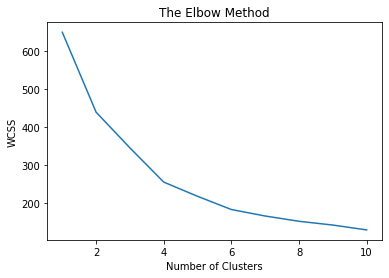

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmns = KMeans(n_clusters = i, init = 'k-means++')
  kmns.fit(X)
  wcss.append(kmns.inertia_)
plt.plot(range(1,11), wcss)  
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

In [40]:
kmn = KMeans(n_clusters = 4, init = 'k-means++')

In [41]:
kmn_cl = kmn.fit_predict(X)

In [42]:
print(kmn_cl)

[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 3 0 0 0 1 1 1 1 0 3 2 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


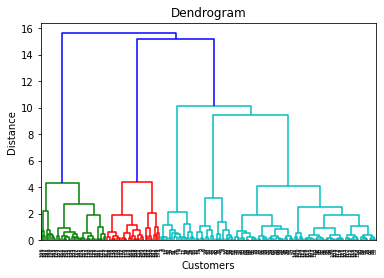

In [48]:
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X[:,[-2,-1]], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [50]:
ac_cl = ac.fit_predict(X)
print(ac_cl)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 1 0 1 0 4 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 1 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 1 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


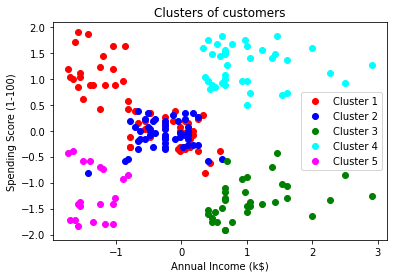

In [51]:
plt.scatter(X[ac_cl == 0, -2], X[ac_cl == 0, -1],  c = 'red', label = 'Cluster 1')
plt.scatter(X[ac_cl == 1, -2], X[ac_cl  == 1, -1],  c = 'blue', label = 'Cluster 2')
plt.scatter(X[ac_cl == 2, -2], X[ac_cl == 2, -1],  c = 'green', label = 'Cluster 3')
plt.scatter(X[ac_cl == 3, -2], X[ac_cl == 3, -1],  c = 'cyan', label = 'Cluster 4')
plt.scatter(X[ac_cl == 4, -2], X[ac_cl == 4, -1], c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()